In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import math
import numpy.random as rd

Cmoy= 0.0011878109283649802 mol L^-1
u_C= 0.004199577781330669 5 g L^-1


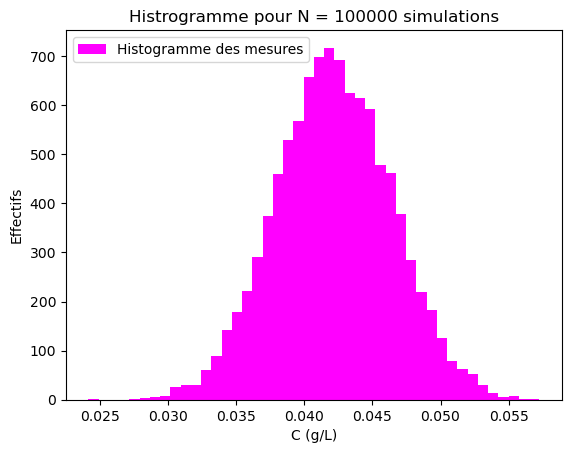

In [10]:
#Données du problème
V = 10            #Volume titré en mL
Ct = 0.001        # Concentration de la solution titrante de soude en mol L^-1
Veq = 11.9        #Volume équivalent en mL

# Données pour la simulation Monte Carlo
a_V = 0.02         #Tolérance de la pipette jaugée de 10 mL en mL
u_Ct = 1e-4        #Incertitude type sur la concentration
a_Veq= 0.05        #demi largeur de la distribution uniforme(ou rectangulaire) sur le volume équivalent

#simulation Monte Carlo
N = 10000                                                    #nombre de simulations souhaité
 
Ct_sim = Ct + np.random.normal(0, u_Ct, N)                   #utilisation d'une distribution gaussienne(ou normale) car on connaît l'incertitude-type.
Veq_sim = Veq + np.random.uniform(-a_Veq, +a_Veq, N)         #utilisation d'une distribution uniforme pour Veq car on connaît la 1/2 étendue.
V_sim = V + np.random.uniform(-a_V, +a_V, N)                 #utilisation d'une distribution uniforme pour V car on connaît la 1/2 étendue.

C=Ct_sim*Veq_sim/V_sim

Cmoy=np.average(C)                              #Renvoie la moyenne des N valeurs  de C obtenues lors de la simulation
u_C=np.std(C,ddof=1)                            #Renvoie l'écart-type expérimental de la série des N simulations : c'est l'incertitude-type

print('Cmoy=', Cmoy, 'mol L^-1')              
print('u_C=', u_C*35,5, 'g L^-1')

plt.hist(C*35.5,bins='rice',label='Histogramme des mesures',color='magenta')
plt.title('Histrogramme pour N = 100000 simulations')
plt.xlabel('C (g/L)')
plt.ylabel('Effectifs')
plt.legend()
plt.show()

In [11]:
#Incertitude sur le flux de perméat

V = np.array([22, 38, 59, 77, 91])
t = np.array([60, 60, 60, 60, 60])

# Equations permettant de calculer le débit de permeation, Q, puis le flux de permeation, J
Q = V * 1e-6 / t  # m3/s
S = 0.46  # m2
J = Q / (S)  # m/s

# Données pour la simulation Monte Carlo
u_V = 10  # incertitude sur le volume du perméat
u_t = 1 # Incertitude type sur le temps

# Simulation Monte Carlo
N = 10000  # nombre de simulations souhaité
u_J = np.zeros(len(V))  # tableau pour stocker les incertitudes de chaque couple de données
for i in range(len(V)):
    J_sim = np.zeros(N)  # tableau pour stocker les valeurs simulées de J
    for j in range(N):
        V_sim = V[i] + rd.uniform(-u_V, u_V)  # variation aléatoire de V[i]
        t_sim = t[i] + rd.uniform(-u_t, u_t)  # variation aléatoire de t[i]
        Q_sim = V_sim * 1e-6 / t_sim
        J_sim[j] = Q_sim / (S)
    u_J[i] = np.std(J_sim, ddof=1)  # Incertitude-type de J pour le couple de données t[i] et V[i]

for i in range(len(V)):
    print(f"Incertitude-type pour le couple de données t[{i}]={t[i]} et V[{i}]={V[i]} : u_J[{i}] = {u_J[i]}")

Incertitude-type pour le couple de données t[0]=60 et V[0]=22 : u_J[0] = 2.0927794828345865e-07
Incertitude-type pour le couple de données t[1]=60 et V[1]=38 : u_J[1] = 2.097750613905576e-07
Incertitude-type pour le couple de données t[2]=60 et V[2]=59 : u_J[2] = 2.1154851411169267e-07
Incertitude-type pour le couple de données t[3]=60 et V[3]=77 : u_J[3] = 2.113302292499952e-07
Incertitude-type pour le couple de données t[4]=60 et V[4]=91 : u_J[4] = 2.1289856990153693e-07


Résistance hydraulique de la membrane, Rm= 3.90e+13 m-1


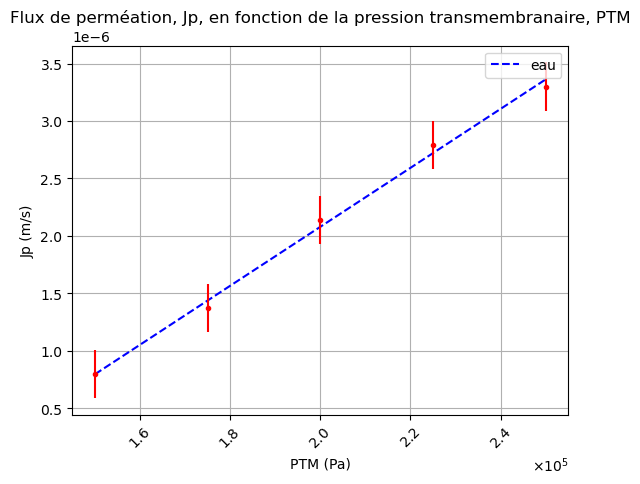

In [12]:
#Valeurs de pression transmembranaire
PTM_bar_alim=np.array([2,2.5,3,3.5,4])
PTM_bar_ret=np.array([1,1,1,1,1])
PTM = 1e5*(PTM_bar_alim +  PTM_bar_ret)/2     #calcul de la PTM en Pa

#Valeurs de volume filtré en ml 
V=np.array([22,38,59,77,91])
#Valeurs de temps en s correspondant aux volumes 
t=np.array([60,60,60,60,60])

#Equations permettant de calculer le débit de permeation, Q, puis le flux de permeation, J
Q=V*1e-6/t #m3/s
S=0.46 #m²
J=Q/S #m/s

reglin_perm= np.polyfit(PTM,J,1)
a=reglin_perm[0]
b=reglin_perm[1]
plt.plot(PTM, a*PTM+b, 'b--', label='eau')
plt.errorbar(PTM, J, yerr = u_J, fmt='r.')

plt.title('Flux de perméation, Jp, en fonction de la pression transmembranaire, PTM')
plt.xlabel('PTM (Pa)')
plt.ylabel('Jp (m/s)')
plt.legend()

# écriture scientifique en abscisse 
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xticks(rotation=45)
plt.grid(True)        # Ajoute un cadrillage

#calcul de la résistance hydraulique
mu=0.001 #Pa.s ou kg m-1 s-1
Rm=1/(mu*a)
###print('Perméabilité de la membrane, Lp=', a*1000*3600*1e5,' L/(h.m2.bar)')
print('Résistance hydraulique de la membrane, Rm=', format(Rm, ".2e"),'m-1')

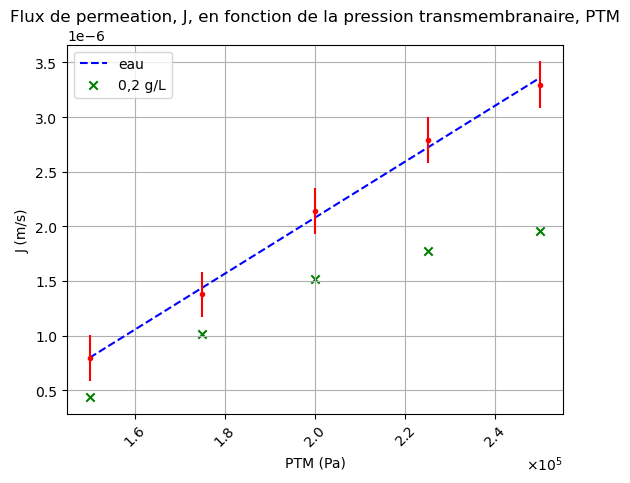

La contre pression osmotique est [0.14124294 0.14124294 0.24011299 0.39548023 0.52259887] bar
0.14 bar
0.14 bar
0.24 bar
0.40 bar
0.52 bar


In [13]:
#Mise en évidence de la pression osmotique

#Valeurs de temps en s correspondant aux volumes 
t=np.array([60,60,60,60,60])

#Tableaux de volumes en ml 
V02=np.array([12,28,42,49,54])

#Calculs des flux de perméation
J_02gl=(V02*1e-6/t)/(S) #m/s

#Tracé des flux de permeation en fonction de la PTM

reglin_perm= np.polyfit(PTM,J,1)
a=reglin_perm[0]
b=reglin_perm[1]
plt.plot(PTM, a*PTM+b, 'b--', label='eau')
plt.errorbar(PTM, J, yerr = u_J, fmt='r.')

plt.scatter(PTM, J_02gl, marker='x', color='g', label='0,2 g/L')

# écriture scientifique en abscisse 
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xticks(rotation=45)
plt.grid(True) 

plt.legend(loc='best')
plt.title('Flux de permeation, J, en fonction de la pression transmembranaire, PTM')
plt.xlabel('PTM (Pa)')
plt.ylabel('J (m/s)')
plt.grid(True)
plt.show()

#Calcul approximatif de la pression osmotique
A=a
CoPO=(J-J_02gl)*(1/A)
print('La contre pression osmotique est', CoPO*1e-5 , 'bar')
l=list(CoPO)
L=[valeur*1e-5 for valeur in l]
for i in range(len(L)):
    print (format(L[i],".2f") , 'bar')

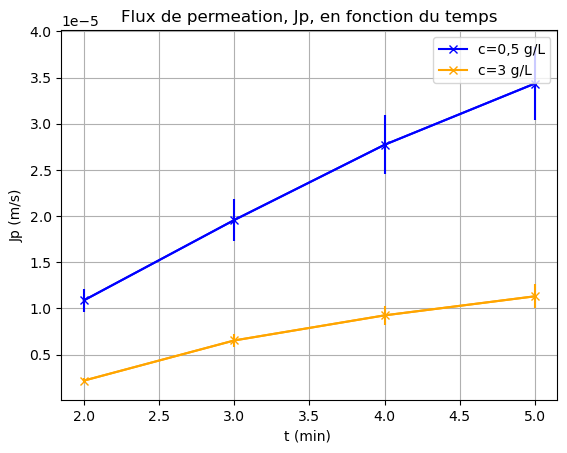

In [14]:
#INFLUENCE DE LA CONCENTRATION

#Concentrations utilisées 
'''Jp1 (C= 0.5 g/L ; P=4,4 bars)
Jp2 (C= 3 g/L ; P=4,4 bars)'''

#Tableaux de volumes en ml, on lit les volumes dans le perméat obtenu au temps correspondant
V_05gl=np.array([10,27,51,79])
V_3gl=np.array([2,9,17,26])

#Temps correspondant au prise de volume
t1=np.array([2,3,4,5])

#Calculs des flux de perméation
J_05gl=(V_05gl*1e-6/(t1))/(S) #m/s
J_3gl=(V_3gl*1e-6/(t1))/(S) #m/s

#incertitude sur J
deltaJ_05= 20/100* J_05gl  #choix sur incertitude de J 
u_J05=  deltaJ_05 / np.sqrt(3) 

deltaJ_3= 20/100 * J_3gl
u_J3=  deltaJ_3 / np.sqrt(3) 

#Tracé des flux de permeation
plt.plot(t1, J_05gl, marker='x', color='b', label='c=0,5 g/L')
plt.plot(t1, J_3gl, marker='x', color='orange', label='c=3 g/L')

plt.legend(loc='best')
plt.title('Flux de permeation, Jp, en fonction du temps')
plt.xlabel('t (min) ')
plt.ylabel('Jp (m/s)')
plt.errorbar(t1, J_05gl, yerr = u_J05, fmt='b-', label='c=0,2 g/L')  #incertitude sur le flux de perméation de J_O,5g/l de l'ordre de 2*u_J
plt.errorbar(t1, J_3gl, yerr = u_J3, fmt='orange', label='c=3 g/L')  #incertitude sur le flux de perméation de J_3g/l de l'ordre de 2*u_J
plt.grid(True)
plt.show()

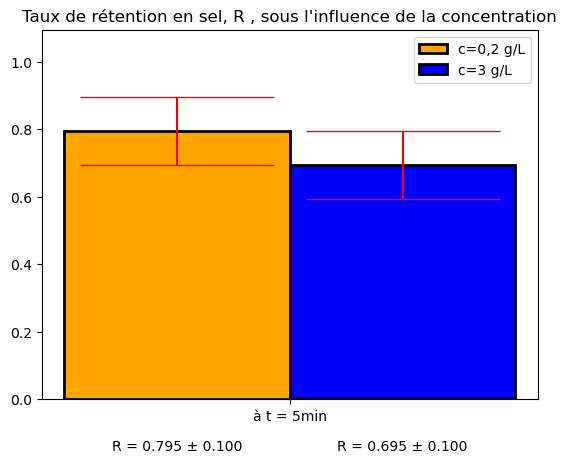

In [15]:
### influence de la concentration sur la qualité du permeat

largeur_barre = 0.3# Largeur de chaque barre 

u_R = np.array([0.1, 0.1]) #incertitude sur R

#mesure pour c_initial 0.2 g/l :on a 0.041 g/l
#mesure pour c_initial 2 g/l : on a 0.23 g/l
cp=np.array([0.041,0.61])  # 0.2 g/l ; 2 g/l 
ca=np.array([0.2,2])   
R=np.array(1-(cp/ca)) #taux de rétention (pourcentage de sel retenu par la membrane)

y1 = [R[0]]
y2 = [R[1]]
x1 = range(len(y1)) # Position de c=0.2g/l
x2 = [i + largeur_barre for i in x1] # Position de c= 2 g/l

#tracé de l'histogramme
b1=plt.bar(x1, y1, width = largeur_barre, color = 'orange', edgecolor = 'black', linewidth = 2,)
b2=plt.bar(x2, y2, width = largeur_barre, color = 'blue', edgecolor = ['black' for i in y1], linewidth = 2)

#barre d'incertitude
plt.errorbar(x1, y1, yerr=u_R[0], fmt='none', ecolor='red', capsize=70)
plt.errorbar(x2, y2, yerr=u_R[1], fmt='none', ecolor='red', capsize=70)

#légende 
plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],['à t = 5min'])
plt.title("Taux de rétention en sel, R , sous l'influence de la concentration")
plt.text(x1[0], -0.15, f"R = {R[0]:.3f} ± {u_R[0]:.3f}", ha='center')
plt.text(x2[0], -0.15, f"R = {R[1]:.3f} ± {u_R[1]:.3f}", ha='center')
plt.ylim(0, max(max(y1), max(y2)) + 0.3)
plt.legend([b1, b2], ['c=0,2 g/L', 'c=3 g/L'])
plt.show()

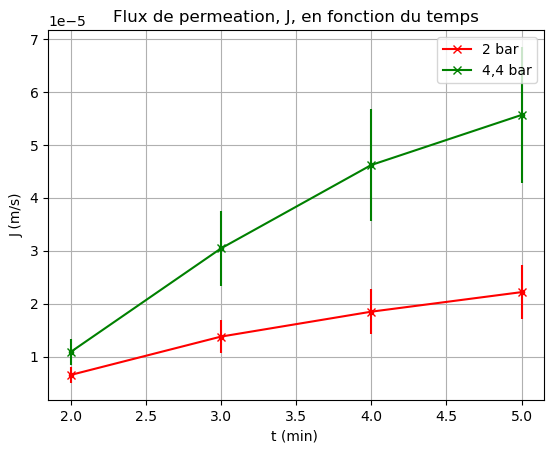

In [16]:
#INFLUENCE DE LA PRESSION 
'''Jp1 (C= 0.2 g/L ; P=2 bars)
Jp2 (C= 0.2 g/L ; P=4,4 bars)'''

#Tableaux de volume en ml 
V_2bar=np.array([6,19,34,51])
V_44bar=np.array([10,42,85,128])

#temps
t1=np.array([2,3,4,5])

#Calculs des flux de perméation
J_2bar=(V_2bar*1e-6/(t1))/(S) #m/s
J_44bar=(V_44bar*1e-6/(t1))/(S) #m/s

#incertitude sur J
deltaJ_2bar=(20/100) * J_2bar
u_J_2bar=  deltaJ_2bar / np.sqrt(3) 

deltaJ_44bar=(20/100) * J_44bar
u_J_44bar=  deltaJ_44bar / np.sqrt(3) 

#Tracé des flux de permeation

plt.plot(t1, J_2bar, marker='x', color='r', label='2 bar')
plt.plot(t1, J_44bar, marker='x', color='g', label='4,4 bar')

plt.legend(loc='best')
plt.title('Flux de permeation, J, en fonction du temps')
plt.xlabel('t (min) ')
plt.ylabel('J (m/s)')
plt.errorbar(t1, J_2bar, yerr = 2*u_J_2bar, fmt='r.')  
plt.errorbar(t1, J_44bar, yerr = 2*u_J_44bar, fmt='g.')  
plt.grid(True)
plt.show()

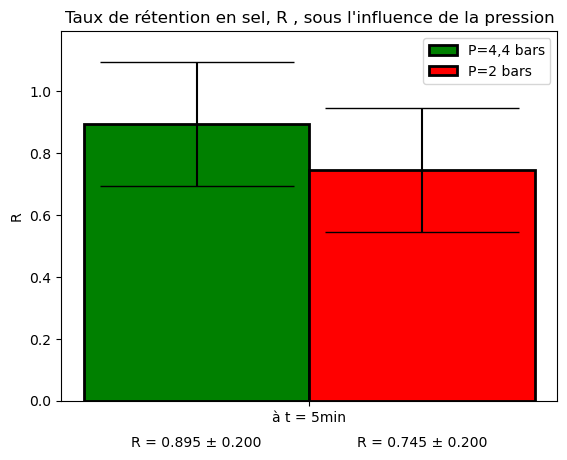

In [17]:
#influence de la pression 
#mesure à 0.2g/l pression : 2 bars ; 4.4bars

largeur_barre = 0.3# Largeur de chaque barre 

u_R = np.array([0.2, 0.2]) #incertitude sur R
cp=np.array([0.021,0.051]) # 2 bars ; 4.4bars
ca=np.array([0.2,0.2])
R=np.array(1-(cp/ca))

#tracé de l'histogramme
y1 = [R[0]]
y2 = [R[1]]
x1 = range(len(y1)) # Position de P=4,4bar
x2 = [i + largeur_barre for i in x1] # Position de P=2bar
b1=plt.bar(x1, y1, width = largeur_barre, color = 'green', edgecolor = 'black', linewidth = 2,)
b2=plt.bar(x2, y2, width = largeur_barre, color = 'red', edgecolor = ['black' for i in y1], linewidth = 2)
plt.errorbar(x1, y1, yerr=u_R[0], fmt='none', ecolor='black', capsize=70)
plt.errorbar(x2, y2, yerr=u_R[1], fmt='none', ecolor='black', capsize=70)

#légende
plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],['à t = 5min'])
plt.title("Taux de rétention en sel, R , sous l'influence de la pression")
plt.text(x1[0], -0.15, f"R = {R[0]:.3f} ± {u_R[0]:.3f}", ha='center')
plt.text(x2[0], -0.15, f"R = {R[1]:.3f} ± {u_R[1]:.3f}", ha='center')
plt.ylim(0, max(max(y1), max(y2)) + 0.3)
plt.ylabel('R')
plt.legend([b1, b2], ['P=4,4 bars', 'P=2 bars'])
plt.show()